In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Loading The Data

In [2]:
data=pd.read_csv("../input/yahoo-troll-question-detection/train_df.csv")
data.head()

,qid,question_text,target
0,dda0b0efc8ba86e81ec4,What are interesting facts about Microsoft his...,0
1,dc708b74a108d0fc0ad9,What are those things which are not gonna happ...,0
2,06a27ec5d82dacd8bfe0,"What should I know to avoid being ""upsold"" whe...",0
3,00cbb6b17e3ceb7c5358,How I add any account with payment bank?,0
4,7c304888973a701585a0,Which Multi level marketing products are actua...,0



# Data Cleaning

In [3]:
data=data.drop(['qid'],axis=1)
data.head(2)

,question_text,target
0,What are interesting facts about Microsoft his...,0
1,What are those things which are not gonna happ...,0


In [4]:
data.isna().sum()

question_text    0
target           0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.shape

(1000000, 2)

# EDA


In [7]:
data['target'].value_counts()            # 1-troll 

0    938130
1     61870
Name: target, dtype: int64

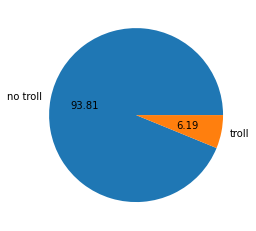

In [8]:
plt.pie(data['target'].value_counts(),labels=['no troll','troll'],autopct="%0.2f")
plt.show()

# Data Preprocessing

In [9]:
import nltk
import re
nltk.download('all')
#nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ob=PorterStemmer()

[nltk_data] Error loading all: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


In [11]:
def lowercase(text):
    text=text.lower()
    #print(text)
    return text

In [12]:
def tokenize(text):
    text=text.split()
    #print(text)
    return text
    

In [13]:
def regularization(text):
    text=re.sub('[^a-zA-Z0-9]',' ',text)
    #print(text)
    return text
    

In [14]:
def removestopword(text):
    text=[word for word in text if not word in stopwords.words('english')]
    #print(text)
    return text

In [15]:
def stemming(text):
    tt=[ob.stem(word) for word in text]
    text=tt[:]
    #print(text)
    return text
        

In [16]:
def processing_text(text):
    text=regularization(text)
    text=lowercase(text)
    text=tokenize(text)
    #print(text)
    text=removestopword(text)
    text=stemming(text)
    text=" ".join(text)
    return text

         

In [18]:
processing_text("How I add any account with payment bank?")

'add account payment bank'

In [19]:
processed_text=[]
for i in range(2000):
    processed_text.append(processing_text(data['question_text'][i]))
processed_text
    
    
    

['interest fact microsoft histori',
 'thing gonna happen ever',
 'know avoid upsold get car brake chang',
 'add account payment bank',
 'multi level market product actual worth purchas',
 'scope would recommend remington model 700 270 shoot 5 600 yard',
 'black peopl sustain civil',
 'citi better de moin omaha',
 'thicken stir fri sauc',
 'woman squirt rub clit gentli',
 'us annual parad icbm street washington dc',
 'tran woman queef',
 'telugu word kannukottadam call english',
 'art class use live art model figur draw instead use pictur curiou appli model',
 'cat exam provid onlin score like bitsat candid better idea appli',
 'make statement referenc two distinct element div tag javascript',
 'hungarian openli racist islamophob',
 'myer brigg type indic valid thing seem much common infj label',
 'best microcontrol help real time updat app',
 'born north carolina live 3 5 year move wisconsin heard resid multipl state one time could resid nc born live current',
 'democrat think karl mar

In [20]:
test=pd.read_csv('../input/yahoo-troll-question-detection/test_df.csv')
test.head(5)

,qid,question_text
0,a4f3da3a3df9dd881edd,My period is due on my wedding day. How can I ...
1,9914c62ed3f69684d549,How many numbers higher than a million can be ...
2,8138ae48649e37091a91,"How come I feel nothing for my family, but sti..."
3,981b4753d17ef14d09f7,"In case of collapse of the Democratic party, w..."
4,452e2c705276ba16b7b7,Who is Émile Naoumoff?


In [21]:
test=test.drop(['qid'],axis=1)
test.head(3)

,question_text
0,My period is due on my wedding day. How can I ...
1,How many numbers higher than a million can be ...
2,"How come I feel nothing for my family, but sti..."


In [29]:
test_processed=[]
for i in range(0,2000):
    test_processed.append(processing_text(test['question_text'][i]))
#test_processed

In [30]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=4000)

In [31]:
#Cv_X=cv.fit_transform(processed_text).toarray()    # BAG OF WORDS
Tfdif_X=tfidf.fit_transform(processed_text).toarray()   #TF-IDF

In [32]:
Tfdif_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
#Cv_Ytest=cv.fit_transform(test_processed).toarray()
#Tfdif_Ytest=tfidf.fit_transform(test_processed).toarray()